Tasks

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [9]:
df=pd.read_csv('extended_salary_data.csv')

In [10]:
df.describe()

,YearsExperience,Salary
count,50.000000,50.00000
mean,9.480000,77370.54740
std,5.485491,28298.92442
min,1.400000,33048.80000
25%,4.500000,53861.88000
50%,9.300000,78598.65000
75%,13.350000,95356.22500
max,19.400000,140646.44000


In [11]:
df=pd.read_csv('extended_salary_data.csv')
df_x = df.drop(columns=['Salary'])
df_y = df['Salary'] 
lr=linear_model.LinearRegression()
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.30)
lr.fit(df_x_train,df_y_train)
df_y_predict=lr.predict(df_x_test)
print("MSE is:",mean_squared_error(df_y_test,df_y_predict))
print("MAE is:",mean_absolute_error(df_y_test,df_y_predict))
#score=lr.score(df_x_test,df_y_test)
#print(score)

MSE is: 98211463.7657676
MAE is: 8669.413596641814


Slope: 4537.3401317682265
Intercept: 34897.06086458205


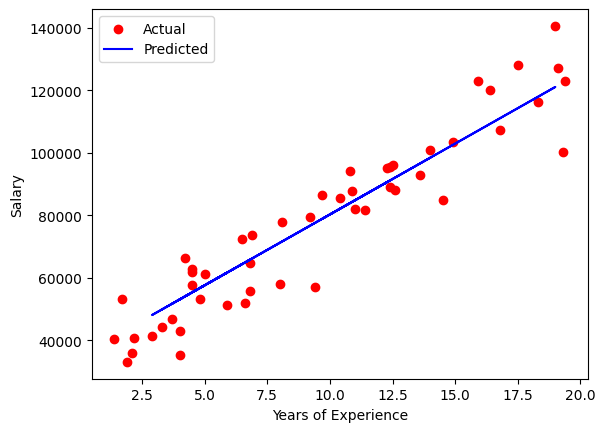

In [12]:
plt.scatter(df.YearsExperience,df.Salary,label="Actual",color='r') #to plot scattered points
plt.plot(df_x_test['YearsExperience'],df_y_predict,label="Predicted",color='b') #to plot straight line
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

slope = lr.coef_[0]
intercept = lr.intercept_

print("Slope:", slope)
print("Intercept:", intercept)

plt.show()

**Bonus Task**

**Bonus Task**

In [15]:
#data of number of projects loosely related to years experience
df=pd.read_csv('extended_salary_data.csv')
years_experience = df['YearsExperience'].to_numpy()

noise_factor=4 #standard deviation
#num_projects_completed = 2 * years_experience + np.random.normal(0, noise_factor=4, num_samples=50)
num_projects_completed = (2 * years_experience + np.random.normal(0, noise_factor, len(years_experience))).astype(int)
np.abs(num_projects_completed) #to avoid negative values also astype(int) is used to get only integer value

df_x['NumProjectsCompleted'] = num_projects_completed  # Adding the new feature

df_x = df.drop(columns=['Salary']) 
df_y = df['Salary'] 
lr=linear_model.LinearRegression()
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.30)

lr.fit(df_x_train,df_y_train)

df_y_predict=lr.predict(df_x_test)

print("MSE is:",mean_squared_error(df_y_test,df_y_predict))
print("MAE is:",mean_absolute_error(df_y_test,df_y_predict))








MSE is: 41787716.85110548
MAE is: 5560.458941084797


C:\Users\deepa\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


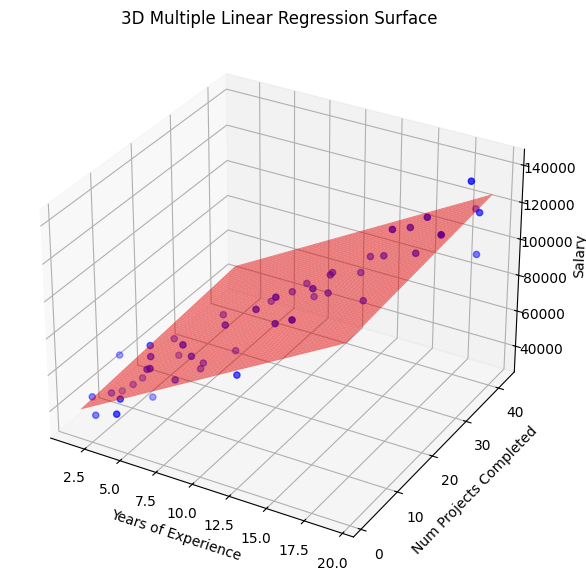

In [46]:




# Create a meshgrid for the 3D plot
x_range = np.linspace(df['YearsExperience'].min(), df['YearsExperience'].max(), 100)
y_range = np.linspace(df['NumProjectsCompleted'].min(), df['NumProjectsCompleted'].max(), 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Predicting the salary values for the meshgrid points
z_mesh = lr.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()]).reshape(x_mesh.shape)

# Plotting the data points and the regression plane
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data points
ax.scatter(df['YearsExperience'], df['NumProjectsCompleted'], df['Salary'], color='blue', label='Data points')

# Plot the regression surface (plane)
ax.plot_surface(x_mesh, y_mesh, z_mesh, color='red', alpha=0.5)

#labellinh
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Num Projects Completed')
ax.set_zlabel('Salary',labelpad = 6)
ax.set_title('3D Multiple Linear Regression Surface')

# Set the view angle to show the edge view of the plane
#ax.view_init(elev=32, azim=10)  # Change these values for a different edge view

# Show the plot
plt.show()

